## регулярные выражения

#### сырые и обычные строки

In [9]:
# обычные строки
x = 'hello\nworld'
print(x)
x = 'hello\'world'
print(x)
# но если мы не хотим, чтобы интерпретатор считывал служебные символы, строка станет сырой
print('          ')
# для шаблона именно такие и нужны
x = r'hello\nworld'
print(x)
x = r'hello\'world' # r - raw
print(x)

hello
world
hello'world
          
hello\nworld
hello\'world


#### шаблон регуляных выражений - сырые строки

In [10]:
import re

print(re.match) # берет шаблон, берет строку и проверяет подходит ли строка под шаблон(начиная с 0го символа)
print(re.search) # находит первую подстроку, которая подходит под наш шаблон 
print(re.findall) # будет находить все подстроки нашей строки, которые подходят под наш шаблон 
print(re.sub) # заменить все вхождения подстрок которые подходят под наш шаблол чем нибудь другим

<function match at 0x7f17d4b0bf28>
<function search at 0x7f17d4ad26a8>
<function findall at 0x7f17d4ad28c8>
<function sub at 0x7f17d4ad2730>


In [17]:
pattern = r'abc'
string = 'abcсссabcabc'
match_obj = re.match(pattern, string)
print(match_obj)

<_sre.SRE_Match object; span=(0, 3), match='abc'>


match - наш шаблон <br>
span - с какой по какую строки находятся наше вхождение (первое как я понял). И функция ищет по началу строки.<br>
Для того, чтобы искать не сначала, нужна функция search

In [18]:
pattern = r'abc'
string = 'bbbabcсссabcabc'
match_obj = re.search(pattern, string)
print(match_obj)

<_sre.SRE_Match object; span=(3, 6), match='abc'>


Здесь span показывает только первое вхождение. Значения span можно использовать для слайсинга

### метасимволы

In [30]:
# . ^ $ * + {} [] \ | ()

#### [  ] - указывается множетсво подходящих символов

In [23]:
pattern = r'a[acb]c' # запись означает, что вторым символов может быть a b c 
string = 'bbbabcсссabcabc'
match_obj = re.search(pattern, string)
print(match_obj)

<_sre.SRE_Match object; span=(3, 6), match='abc'>


#### findall

In [24]:
pattern = r'a[acb]c' # запись означает, что вторым символов может быть a b c 
string = 'abc, acc, aac'
all_inclusions = re.findall(pattern, string)
print(all_inclusions) # возвращается список

['abc', 'acc', 'aac']


#### sub

In [26]:
pattern = r'a[acb]c' # запись означает, что вторым символов может быть a b c 
string = 'abc, acc, aac'
fixed_typos = re.sub(pattern,'abc', string) # второй аргумент, на что надо заменить найденный шаблон
print(repr(fixed_typos))


'abc, abc, abc'


#### ? 

In [29]:
import re

pattern = r' english\?'
string = 'Do you speak english?'
match = re.search(pattern, string)
print(match)

<_sre.SRE_Match object; span=(12, 21), match=' english?'>


чтобы использовать метасимволы в качестве обычных символов, нужно заключить их в обратный слэш

#### - диапозон

In [32]:
pattern = r'a[a-zA-z]c'# здесь важен регистр. A-Z - все большие буквы алфавита
string = 'acc'
match_obj = re.match(pattern, string)
print(match_obj)

string = 'abc, acc, aac, adc'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

string = 'abc, acc, aac'
fixed_typos = re.sub(pattern,'abc', string) 
print(repr(fixed_typos))

<_sre.SRE_Match object; span=(0, 3), match='acc'>
['abc', 'acc', 'aac', 'adc']
'abc, abc, abc'


#### ^ -  cirkoflex, отрицание, мы им указываем, что не подходит 

In [35]:
pattern = r'a[^a-zA-z]c' 
string = 'acc'
match_obj = re.match(pattern, string)
print(match_obj)

string = 'abc, acc, a_c, a-c, a.c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

string = 'abc, acc, aac'
fixed_typos = re.sub(pattern,'abc', string) 
print(repr(fixed_typos))

None
['a-c', 'a.c']
'abc, acc, aac'


#### символьные сокращения <br>
**[]** - множество подходящих символов <br>
**\b - ** включить любые символы перед строкой, кроме цифр и букв, используется для того,чтобы показать что слово закончилось  <br>
**\B - ** Или цифра или буква <br>
**\d - [0-9]**- все цифры <br>
**\D - [^0-9]** - все кроме цифр <br>
**\s - [\t\n\r\f\v]** - все пробельные символы <br>
**\S - [^\t\n\r\f\v]** - все кроме пробельных символов <br>
**\w - [a-zA-Z0-9_]** - цифры+буквы+_ <br>
**\W - [^a-zA-Z0-9_]** - все кроме цифры+буквы+_ 

In [36]:
#pattern = r'a[a-zA-z]c' 
pattern = r'a\wc' # тоже самое что и выше, только с цифрами и нижним подчеркиванием
pattern = r'a[\w.]c' # слайсы для множества
string = 'acc'
match_obj = re.match(pattern, string)
print(match_obj)

string = 'abc, acc, a_c, a-c, a.c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

string = 'abc, acc, aac'
fixed_typos = re.sub(pattern,'abc', string) 
print(repr(fixed_typos))

<_sre.SRE_Match object; span=(0, 3), match='acc'>
['abc', 'acc', 'a_c']
'abc, abc, abc'


#### . - любой символ

In [37]:
pattern = r'a.c'
string = 'acc'
match_obj = re.match(pattern, string)
print(match_obj)

string = 'abc, acc, a_c, a-c, a.c'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

string = 'abc, acc, aac'
fixed_typos = re.sub(pattern,'abc', string) 
print(repr(fixed_typos))

<_sre.SRE_Match object; span=(0, 3), match='acc'>
['abc', 'acc', 'a_c', 'a-c', 'a.c']
'abc, abc, abc'


#### Метасимволы связанные с количеством искомых символов
\* - любое количество включая ноль <br>
\+ - только положительное число включений <br>
\? - 0 или 1 вхождение <br>
{\d} - конкретное количество вхождений цифрами. Второй аргумент в скобках верхняя граница. 
##### по дефолту, символы повтора являются "жадными", то есть пытаются завлечь в себя как можно больше символов

In [38]:
pattern = r'ab*a'
string = 'aa, aba, abba'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['aa', 'aba', 'abba']


In [41]:
pattern = r'ab+a'
string = 'aa, aba, abba'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['aba', 'abba']


In [39]:
pattern = r'ab?a'
string = 'aa, aba, abba'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['aa', 'aba']


In [42]:
pattern = r'ab{3}a'
string = 'aa, aba, abbba'
all_inclusions = re.findall(pattern, string)
print(all_inclusions)

['abbba']


#### 'Жадность'

In [43]:
pattern = r'a[ab]+a' 
string = 'abaaba' 
print(re.match(pattern, string)) 
print(re.findall(pattern, string))
# по идее он может остановится в поиске уже на 2 символе(0, 3), 
# но мы видим что он доходит до 5(0, 6), потому что жадный

<_sre.SRE_Match object; span=(0, 6), match='abaaba'>
['abaaba']


In [44]:
# однако можно убрать 'жадность' с помощью \?
pattern = r'a[ab]+?a' #таким образом будет показано минимальное возможная строка 
string = 'abaaba' 
print(re.match(pattern, string)) 
print(re.findall(pattern, string))

<_sre.SRE_Match object; span=(0, 3), match='aba'>
['aba', 'aba']


#### () - группировка

In [49]:
import re 

pattern = r'(test)*' # в данном случае, искать будет не по 1 символу а по 4, они будут всприниматься как 1
string  = 'testtesttesttest'

match = re.match(pattern, string)
print(match)

<_sre.SRE_Match object; span=(0, 16), match='testtesttesttest'>


In [50]:
import re 

pattern = r'abc|(test|text)*' # | знак или,то есть будет искать цельный симвов test или text
string  = 'testtesttext'

match = re.match(pattern, string)
print(match)

<_sre.SRE_Match object; span=(0, 12), match='testtesttext'>


In [51]:
import re 

pattern = r'((abc)|(test|text)*)' # 
string  = 'abc'

match = re.match(pattern, string)
print(match)
print(match.groups()) # здесь можно заметить, что каждая из группировок 
# действительно соответствует некоторой группе поиска. 
# У нас первая группа - обширные скобки, 2 - abc, 3 - (test|text)*

<_sre.SRE_Match object; span=(0, 3), match='abc'>
('abc', 'abc', None)


In [58]:
import re 

pattern = r'Hello (abc|test)' 
string  = 'Hello abc'

match = re.match(pattern, string)
print(match)
print(match.groups())
print(match.group(0)) # дефолтное значение, показать совпадения
print(match.group(1)) # здесь мы ищем совпадение по второй группировке

<_sre.SRE_Match object; span=(0, 9), match='Hello abc'>
('abc',)
Hello abc
abc


#### \ - с их помощью можно обращатся к группам прям внутри шаблона

In [60]:
import re 

pattern = r'(\w+)-\1' # здесь \1 означает, что нужно повторить 1 группу
string  = 'test-test'

match = re.match(pattern, string)
print(match)
print(match.groups()) 

<_sre.SRE_Match object; span=(0, 9), match='test-test'>
('test',)


In [61]:
# также можно сослаться на группу внутри функции sub
import re 

pattern = r'(\w+)-\1' # здесь \1 означает, что нужно повторить 1 группу
string  = 'test-test chow-chow'

duplicate = re.sub(pattern, r'\1',string)
print(duplicate) 

test chow


In [64]:
# с findall нужно аккуратнее, так как с группами она ведет себя нестандартно 

pattern = r'((\w+)-\2)' # так как группы две, то и возвращатся будут кортежы по два значения 
string  = 'test-test chow-chow' 

duplicate = re.findall(pattern, string)
print(duplicate) # возвращает кортеж групп, вместо строк

[('test-test', 'test'), ('chow-chow', 'chow')]


#### специальный флажки, встроенные в модуль

##### ignorecase

In [66]:
import re 

x = re.match(r'text', 'TEXT', re.IGNORECASE) # игнорировать регистр
print(x)

<_sre.SRE_Match object; span=(0, 4), match='TEXT'>


###### debug

In [69]:
x = re.match(r'(te)*?xt', 'TEXT', re.IGNORECASE | re.DEBUG)
print(x)

MIN_REPEAT 0 MAXREPEAT
  SUBPATTERN 1 0 0
    LITERAL 116
    LITERAL 101
LITERAL 120
LITERAL 116
<_sre.SRE_Match object; span=(0, 4), match='TEXT'>


MAX_REPEAT 0 MAXREPEAT - ищем максимальное вхождение, так как поставили * <br>
--SUBPATTERN 1 0 0 - наша группа <br>
----LITERAL 116 - Здесь и делее, код в таблице юникода <br>
----LITERAL 101 - <br>
LITERAL 120 <br>
LITERAL 116


### Regular expressions problems

#  1

Вам дана последовательность строк.
Выведите строки, содержащие "cat" в качестве подстроки хотя бы два раза.

Примечание:
Считать все строки по одной из стандартного потока ввода вы можете, например, так
```python
import sys

for line in sys.stdin:
    line = line.rstrip()
    # process line
```    

**Sample Input:**
```
catcat
cat and cat
catac
cat
ccaatt
```
**Sample Output:**
```
catcat
cat and cat
```


In [99]:
import sys
import re

pattern = r'(cat)'
for line in sys.stdin:
    line = line.rstrip()
    if len(re.findall(pattern, line))>2: 
        print(line)

In [ ]:
import re
import sys

for line in sys.stdin:
    line = line.strip()
    if re.search(r"cat.*cat", line): # достаточно одного вхождения шаблона
        print(line)

# 2

Вам дана последовательность строк.<br>
Выведите строки, содержащие "cat" в качестве слова.

Примечание:<br>
Для работы со словами используйте группы символов **\b** и **\B**.<br>
Описание этих групп вы можете найти в документации.

**Sample Input:**
```
catapult and cat
catcat
concat
Cat
"cat"
!cat?
```
**Sample Output:**
```
cat
catapult and cat
"cat"
!cat?
```

In [ ]:
# Your code complexity score is 5.39 (best for this step is 1.0).
import sys
import re

pattern = r'\bcat\b'
for line in sys.stdin:
    line = line.rstrip()
    if re.findall(pattern, line): 
        print(line)# put your python code here

In [ ]:
# пример Кости зайцева
# put your python code here
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    if re.search(r"\bcat\b", line): # можно использовать просто search, так как нам достаточно одного вхождения
        print(line)

# 3

Вам дана последовательность строк. <br>
Выведите строки, содержащие две буквы "z﻿", между которыми ровно три символа.

**Sample Input:**
```
zabcz
zzz
zzxzz
zz
zxz
zzxzxxz
```
**Sample Output:**
```
zabcz
zzxzz
```

In [103]:
# Your code complexity score is 5.1 (best for this step is 4.0).
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    if re.search(r'z.{3}z', line): 
        print(line)

# 4

Вам дана последовательность строк.<br>
Выведите строки, содержащие обратный слеш "\﻿".

**Sample Input:**
```
\w denotes word character
No slashes here
```
**Sample Output:**
```
\w denotes word character```

In [ ]:
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    if re.search(r'\\', line): 
        print(line)

# 5

Вам дана последовательность строк. <br>
Выведите строки, содержащие слово, состоящее из двух одинаковых частей (тандемный повтор).

**Sample Input:**
```
blabla is a tandem repetition
123123 is good too
go go
aaa
```
**Sample Output:**
```
blabla is a tandem repetition
123123 is good too
```

In [57]:
# Your code complexity score is 5.1 (best for this step is 1.0). У кости зайцева также
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    if re.search(r'\b(\w+)\1\b', line): #\b символ обрыва слова
        print(line)

# 6

Вам дана последовательность строк. <br>
В каждой строке замените все вхождения подстроки "human" на подстроку "computer"﻿ и выведите полученные строки.

**Sample Input:**
```
I need to understand the human mind
humanity
```
**Sample Output:**
```
I need to understand the computer mind
computerity
```

In [59]:
# Your code complexity score is 4.47 (best for this step is 2.0).
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    line = re.sub(r'human','computer', line) 
    print(line)

# 7

Вам дана последовательность строк. <br>
В каждой строке замените **первое** вхождение **слова**, состоящего только из латинских букв **"a"** (регистр не важен), на слово **"argh"**.

**Примечание:**
Обратите внимание на параметр count у функции sub.

**Sample Input:**
```
There’ll be no more "Aaaaaaaaaaaaaaa"
AaAaAaA AaAaAaA
```
**Sample Output:**
```
There’ll be no more "argh"
argh AaAaAaA
```

In [64]:
# Your code complexity score is 4.47 (best for this step is 2.0). у зайцева также
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    line = re.sub(r'\ba+\b','argh', line, count = 1, flags = re.IGNORECASE) 
    print(line)

# 8

Вам дана последовательность строк.<br>
В каждой строке поменяйте местами две первых буквы в каждом слове, состоящем хотя бы из двух букв.
Буквой считается символ из группы **\w**.

**Sample Input:**
```
this is a text
"this' !is. ?n1ce,
```
**Sample Output:**
```
htis si a etxt
"htis' !si. ?1nce,```

In [65]:
import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    line = re.sub(r'\b(\w)(\w)(\w*)\b',r'\2\1\3', line) # обратить внимание на то, как вставляется нужное значение
    print(line)

# 9

Вам дана последовательность строк. <br>
В каждой строке замените все вхождения нескольких одинаковых букв на одну букву.
Буквой считается символ из группы **\w**.

**Sample Input:**
```
attraction
buzzzz
```
**Sample Output:**
```
atraction
buz```

In [66]:

import re
import sys

for line in sys.stdin:
    line = line.rstrip()
    line = re.sub(r'\W*(\w)\1+\W*',r'\1', line) 
    print(line)

# 10


**Примечание:**
Эта задача является дополнительной, то есть ее решение не принесет вам баллы.<br>
Задача сложнее остальных задач из этого раздела, и идея ее решения выходит за рамки простого понимания регулярных выражений как средства задания шаблона строки.<br>
Мы решили включить данную задачу в урок, чтобы показать, что регулярным выражением можно проверить не только "внешний вид" строки, но и заложенный в ней смысл.


Вам дана последовательность строк. <br>
Выведите строки, содержащие двоичную запись числа, кратного 3.

Двоичной записью числа называется его запись в двоичной системе счисления.

**Примечание 2:**
﻿Данная задача очень просто может быть решена приведением строки к целому числу и проверке остатка от деления на три, но мы все же предлагаем вам решить ее, не используя приведение к числу.

**Sample Input:**
```
0
10010
00101
01001
Not a number
1 1
0 0
```
**Sample Output:**
```
0
10010
01001
```

Here is an simple way to do it by hand. Since $1 = 2^2$ ```mod 3```, we get $1 = 2^{2n}$ mod 3 for every positive integer. Furthermore 2 = 22n+1 mod 3. Hence one can determine if an integer is divisible by 3 by counting the 1 bits at odd bit positions, multiply this number by 2, add the number of 1-bits at even bit posistions add them to the result and check if the result is divisible by 3.

Example: $57_{10}=111001_2$. There are 2 bits at odd positions, and 2 bits at even positions. $$2*2 + 2 = 6$$ is divisible by 3. Hence 57 is divisible by 3.

Here is also a thought towards solving question c). If one inverts the bit order of a binary integer then all the bits remain at even/odd positions or all bits change. Hence inverting the order of the bits of an integer n results is an integer that is divisible by 3 if and only if n is divisible by 3. Hence any solution for question a) works without changes for question b) and vice versa. Hmm, maybe this could help to figure out which approach is faster...


In [243]:
# не прошел 2ой тест 
import re
import sys

class Binary: 
    def __init__(self, y=3, x=[]): 
        self.x = x 
        self.y = y
        '''
        x - список бинарных чисел в строковом виде, 
        который нужно проверить. 
        y - кратность чему
        ''' 
    def simulation(self, x): 
        '''
        in case you want simulate sequences of numbers, x - multiplicity,
        '''
        self.x = [(lambda i : bin(i))(i)[2:] for i in range(0,100, x)]
    def evenly(self, x): 
        '''
        eject numbers in even position 
        x - certain number in string view
        '''
        lst = []
        for i in x[1::2]:
            lst.append(i)
        lst = [(lambda i: int(i))(i) for i in lst]
        return sum(lst)
    def check_starts(self):
        for i in self.x: 
            if i.startswith('0') and len(i)>1:
                i = i.replace('0','', 1)
    def oddly(self, x): 
        '''
        eject numbers in odds position 
        x - certain number in string view
        '''
        lst = []
        for i in x[0::2]:
            lst.append(i)
        lst = [(lambda i: int(i))(i) for i in lst]
        return sum(lst)
    def find_et_print(self):
        '''
        Function prints number if it fits the condition 
        '''
        for i in self.x:
            if (self.evenly(i)*self.oddly(i)+2)%self.y==0 or i=='0':
                print(i)  
                

lst = []
for line in sys.stdin:
    line = line.rstrip()
    if re.search(r'\b\d+\b', line): #\b символ обрыва слова
        lst.append(line)
b = Binary(3, lst)
try:
    b.find_et_print()
except ValueError: 
    next

In [ ]:
# то, что подошло
import re 
import sys
pattern = '^((((0+)?1)(10*1)*0)(0(10*1)*0|1)*(0(10*1)*(1(0+)?))|(((0+)?1)(10*1)*(1(0+)?)|(0(0+)?)))$'

for line in sys.stdin: 
    line = line.rstrip()
    if re.search(pattern, line):
        print(line)
        
# https://stackoverflow.com/questions/7974655/regex-for-binary-multiple-of-3

In [ ]:
# Пример решения Кости Зайцева
# http://stackoverflow.com/questions/844867/check-if-a-number-is-divisible-by-3/3253053#3253053
import re
import sys

pattern = "^(0|(1(01*0)*1))*$"
pattern = re.compile(pattern)
for line in sys.stdin:
    line = line.rstrip()
    if pattern.match(line):
        print(line)

---

=============================================================================================================================

# Интернет

=============================================================================================================================

- обмен файлами 
- обмен почтой 
- http

**http protocol**<br> 
- client (internet users)
- server (куда делается запрос)<br>

**query** <br>
- веб страница 
- файлы

**url** <br>
uniform resource locator <br>
https:// - пртокол <br>
stepic.org - домен, хост <br>
/512 - путь до ресурса




**как бы выглядел запрос строки - :** https://ru.wikipedia.org/wiki/Python <br>
![](Selection_001.png)

**GET /wiki/Python HTTP/1.1**

**GET** - method который мы применяем к нашему ресурсу <br>
**/wiki/Python** - ресурс внутри домена(хоста) <br>
**HTTP/1.1** - версия протокола

**Host** - где брать ресурсы


С помощью http - можно передавать музыку, видео, гипертекст 

метод GET - возвращает html код данной страницы. У картинки будут получены бинарные данные. Метод GET не изменяет данные, которые хранятся на сервере. 

Есть метод POST который для этого и предназначен. К примеру, формы смены пароля.


**Как бы выгялдел ответ (Response)** <br>
HTTP/1.1 - версия протокола, с  которого был составлени ответ <br> 
200 OK - статус код + сообщение. К примеру, здесь могла быть известная ошибка 404 

## requests in pyhton 

In [1]:
import requests 

In [33]:
res = requests.get('https://docs.python.org/3.5/')
# get returns response object
print(res.status_code)
print(res.headers['Content-Type'])# res.headers - словарик, где хранятся данные о странице
#print(res.content)
#print(res.text)

200
text/html


In [30]:
res = requests.get('https://docs.python.org/3.5/_static/py.png') # питоновская картинка

print(res.status_code)
print(res.headers['Content-Type'])# image
#print(res.content) # код в бинарном формате
#print(res.text) # нечитаемая ерунда :)
with open('py_image.png', 'wb') as f: 
    f.write(res.content)

200
image/png


In [35]:
res = requests.get('https://yandex.ru/search/',
                  params = {'text':'stepic'}) # также, у каждого ресурсы есть параметры\методы, 
# их можно указать. Но они варьируются в от домена к домену 

print(res.status_code)
print(res.headers['Content-Type'])
print(res.url)
print(res.text)

200
text/html; charset=utf-8
https://yandex.ru/search/?text=stepic
<!DOCTYPE html><html class=i-ua_js_no lang=ru><meta charset=utf-8><meta http-equiv=X-UA-Compatible content="IE=edge"><title>Яндекс</title><script nonce=3938>document.documentElement.className="i-ua_js_yes i-ua_placeholder_"+("placeholder" in document.createElement("input")?"yes":"no");(screen.deviceXDPI&&screen.logicalXDPI&&screen.deviceXDPI/screen.logicalXDPI||window.devicePixelRatio)>1&&(document.documentElement.className+=" i-ua_retina_yes");;document.documentElement.className+=" i-ua_orient_"+(window.innerWidth>window.innerHeight?"landscape":"portrait");</script><link rel=search title="Яндекс" type="application/opensearchdescription+xml" href="/search/opensearch.xml"><meta name=referrer content=always><style nonce=3938 data-role=css data-stylesheet=header>.b-statcounter{position:absolute;left:-9999px}body{margin:0}.b-page__body{margin:0;color:#000;background:#fff;height:100%;padding:0;font-family:Arial,Helvetica,san

----

Рассмотрим два HTML-документа A и B. <br>
Из A можно перейти в B за один переход, если в A есть ссылка на B, т. е. внутри A есть тег ```<a href="B">```, возможно с дополнительными параметрами внутри тега. <br>
Из A можно перейти в B за два перехода если существует такой документ C, что из A в C можно перейти за один переход и из C в B можно перейти за один переход.

Вашей программе на вход подаются две строки, содержащие url двух документов A и B. <br>
Выведите Yes, если из A в B можно перейти за два перехода, иначе выведите No. 

Обратите внимание на то, что не все ссылки внутри HTML документа могут вести на существующие HTML документы.

**Sample Input 1:**
```
https://stepic.org/media/attachments/lesson/24472/sample0.html
https://stepic.org/media/attachments/lesson/24472/sample2.html
```
**Sample Output 1:**
```
Yes
```
**Sample Input 2:**
```
https://stepic.org/media/attachments/lesson/24472/sample0.html
https://stepic.org/media/attachments/lesson/24472/sample1.html
```
**Sample Output 2:**
```
No
```
**Sample Input 3:**
```
https://stepic.org/media/attachments/lesson/24472/sample1.html
https://stepic.org/media/attachments/lesson/24472/sample2.html
```
**Sample Output 3:**
```
Yes```


In [97]:
# Your code complexity score is 23.66 (best for this step is 6.48).
class Refs:
    """
    Class verify wheather hyperreference b can be reached in two 
    clicks from start hyperrefererence.
    a - start hyperreference 
    b - destination hyperreference
    # refs - list of found hrefs in source
    Class uses two exre modules re and requests that should be preinstalled in machine.
    """
    def __init__(self, a = 0, b = 0):
        self.a = input()
        self.b = input()
        self.re = __import__('re')
        self.requests = __import__('requests')
    def req(self, query):
        return self.requests.get(query).text
        '''
        Form response 'a' from request 'a' hypperreference 
        '''
    def find_href(self, source): 
        self.pattern = self.re.compile(r'(http\w*:\/\/(\w*[.:\/\?\=\-]*\w*)+)')
        refs = self.pattern.findall(source)
        refs = [i[0] for i in refs]
        return refs    
        '''
        find all hrefs which starts with http\w*:// and returns list of sources
        '''
    def check(self):
        self.a = self.req(self.a)
        lst = self.find_href(self.a)
        for i in lst:
            i = self.req(i)
            lst_sub  = self.find_href(i)
            if self.b in lst_sub: 
                return True
            else:
                next
    def tell_me(self):
        if self.check()==True:
            print('Yes')
        else: 
            print('No')
            
r = Refs()
r.tell_me()

In [ ]:
# пример Кости Зайцева 

import re
import requests

start_url = input()
end_url = input()

found = False

link_pattern = re.compile(r'<a[^>]*?href="(.*?)"[^>]*?>')

resp = requests.get(start_url).text
for url in link_pattern.findall(resp):
    cur_resp = requests.get(url).text
    if end_url in link_pattern.findall(cur_resp):
        found = True
        break

print("Yes" if found else "No")

----

Вашей программе на вход подается ссылка на HTML файл. <br>
Вам необходимо скачать этот файл, затем найти в нем все ссылки вида ```<a ... href="..." ... > ```и вывести список сайтов, на которые есть ссылка.

Сайтом в данной задаче будем называть имя домена вместе с именами поддоменов. То есть, это последовательность символов, которая следует сразу после символов протокола, если он есть, до символов порта или пути, если они есть, за исключением случаев с относительными ссылками вида
```<a href="../some_path/index.html">```.

Сайты следует выводить в алфавитном порядке.

**Пример HTML файла:**
```
<a href="http://stepic.org/courses">
<a href='https://stepic.org'>
<a href='http://neerc.ifmo.ru:1345'>
<a href="ftp://mail.ru/distib" >
<a href="ya.ru">
<a href="www.ya.ru">
<a href="../skip_relative_links">
```
**Пример ответа:**
```
mail.ru
neerc.ifmo.ru
stepic.org
www.ya.ru
ya.ru```

In [278]:
# Your code complexity score is 12.21 (best for this step is 5.0).
import re
import requests

res = requests.get(input())
docs = res.text
pattern = re.compile(r'(<a.*href=[\'\"htpsf\:]+[\//]+(www.)*(\w+[\-]*\w+\.\w*\.*\w*\.*\w*))')
lst = pattern.findall(docs)
lst1 = [list(i)[1:3] for i in lst]
lst1 = [''.join(i) for i in lst1 ]
lst1 = list(set(lst1))
lst1.sort()
print(*lst1, sep = '\n')

banner.rbc.ru
biztorg.ru
redir.rbc.ru
static.feed.rbc.ru
www.biztorg.ru
www.m-2.ru


In [ ]:
# пример решения кости зайцева 
# Но проблема в том, что другие ребята не довольны, так как это решение не проходит их тесты 
import re
import requests

resp = requests.get(input()).text
sites = set()
for site in re.findall(r'<a.*?href=".*?:\/\/((?:\w|-)+(?:\.(?:\w|-)+)+)', resp):
    sites.add(site)

for site in sorted(sites):
    print(site)

In [ ]:
# интересный пример
import requests, re
for i in sorted({i.group(2) for i in re.finditer(
    r'<a.*?href=[\'|"](\w+://)?(([\w|-]+\.)+\w+).*?>', requests.get(input('')).text)}):
    print(i)

In [ ]:
# рекордсмен
# Your code complexity score is 5.1 (best for this step is 5.1).
import re
import requests


regex = r'<a.*?href=".*?:\/\/((?:\w|-)+(?:\.(?:\w|-)+)+)'

print(
    *sorted(
        set(
            re.findall(
                regex, requests.get(input()).text
            )
        )
    ), sep='\n')

---

# 3.5 Распространённые форматы текстовых файлов: CSV, JSON

In [307]:
# у меня почему-то не работают кавычки как в видео
import csv

with open('commasep.csv') as f: 
    reader = csv.reader(f, delimiter = ',')            # reader - пока файл открыт
    for row in reader:
        print(row)

['first_name', ' last_name', ' module1', ' module2', ' module3', ' description ']
['stedent', ' good', ' 100', ' 100', ' 100', ' excellent score']
['student', ' best', ' 100', ' 90', ' "100', '2"', ' "good score ']
['but could be better" ']


In [300]:
# тоже самое без библиотеки csv
r = []
with open('commasep.csv') as f: 
    for line in f:
        line = line.strip()
        r.append(line.split(','))
for line in r:     
    print(line)

['first_name', ' last_name', ' module1', ' module2', ' module3', ' description']
['stedent', ' good', ' 100', ' 100', ' 100', ' excellent score']
['student', ' best', ' 100', ' 90', ' "100', '2"', ' "good score']
['but could be better"']


In [305]:
# как быть с tsv, здесь лучше распозналось  
import csv

with open('commasep.tsv') as f: 
    reader = csv.reader(f, delimiter='\t')            # reader - пока файл открыт
    for row in reader:
        print(row)

['first_name', 'last_name', 'module1', 'module2', 'module3', 'description ']
['stedent', 'good', '100', '100', '100', 'excellent score']
['student', 'best', '100', '90', '100.2', 'good score \nbut could be better ']


In [312]:
# можно также дозаписывать с файл с помощью этого пакета
import csv

students = [
    ['Grag','Dean', '70', '80', '90', 'Good job, Grag'], 
    ['Wirt', 'Wood', '80', '80.2','80', 'Nicely done' ]
]

with open('commasep.csv', 'a') as f: 
    writer = csv.writer(f)            # reader - пока файл открыт
    for row in students:
        writer.writerow(row)
# можно это сделать по-другому, без итераций. Но в таком случае это может произойти неккоректно
with open('commasep.csv', 'a') as f: 
    writer = csv.writer(f) 
    writer.writerow(students)
# также в данной библиотеке есть спецаильные метки поведения. К прмиеру можно поместить в кавычки что-то
with open('commasep.csv', 'a') as f: 
    writer = csv.writer(f,  quoting = csv.QUOTE_NONNUMERIC)            # почему-то все равно работает не так 
    for row in students:
        writer.writerow(row)

----

Вам дана частичная выборка из датасета зафиксированных преступлений, совершенных в городе Чикаго с 2001 года по настоящее время.

Одним из атрибутов преступления является его тип – Primary Type.

Вам необходимо узнать тип преступления, которое было зафиксировано максимальное число раз в 2015 году.

Файл с данными:
Crimes.csv

In [409]:
import csv
import datetime as dt

com = []
with open('Crimes.csv') as f: 
    reader = csv.reader(f)
    for line in reader:
        com.append(line) # вчитка базы

for i in com[1:]:
    i[2] = dt.datetime.strptime(i[2], '%m/%d/%Y %I:%M:%S %p') # приведение даты к виду

doc = []
for line in com[1:]:
    if line[2]>=dt.datetime(2015, 1, 1, 1, 1, 1): # формирование выборки 
        doc.append(line)

s = set()
for i in doc:               # узнать количество и виды уникальных преступлений
     s.add(i[5])
        
dic = {}
for i in s:                 # с помощью словарика подсчитываем
    count = 0
    for ii in doc: 
        if i==ii[5]:
            count+=1
        dic[i] = count
dic 

{'THEFT': 759,
 'INTIMIDATION': 2,
 'INTERFERENCE WITH PUBLIC OFFICER': 13,
 'OFFENSE INVOLVING CHILDREN': 24,
 'SEX OFFENSE': 13,
 'MOTOR VEHICLE THEFT': 161,
 'GAMBLING': 2,
 'HOMICIDE': 5,
 'CRIMINAL DAMAGE': 379,
 'OTHER OFFENSE': 231,
 'BURGLARY': 170,
 'STALKING': 3,
 'WEAPONS VIOLATION': 33,
 'LIQUOR LAW VIOLATION': 4,
 'ARSON': 3,
 'ASSAULT': 221,
 'PUBLIC PEACE VIOLATION': 32,
 'ROBBERY': 115,
 'CRIM SEXUAL ASSAULT': 17,
 'CRIMINAL TRESPASS': 79,
 'KIDNAPPING': 2,
 'NARCOTICS': 296,
 'PROSTITUTION': 16,
 'DECEPTIVE PRACTICE': 194,
 'BATTERY': 613}

In [ ]:
# можно было проще,хорошее решение

import csv
crimes = [row[5] for row in csv.reader(open("Crimes.csv"))]
print(max(set(crimes), key=lambda x: crimes.count(x)))

---

## json
JavaScript Object Notation

In [413]:
import json
# В читом json ключем может быть только строка, null(js)==None(py), true(js)==True(py)
student1 = {
    'first_name': 'Greg',
    'last_name': 'Dean',
    'scores': [70, 80, 90],
    'description': "Good job, Greg",
    'certificate': True                                # словари. То есть json - список словарей
}

student2 = {
    'first_name': 'Wirt',
    'last_name': 'Wood',
    'scores': [80, 80.2, 80],
    'description': "Nicely Done",
    'certificate': True
}

### dumps
1 аргумент - объект языка python. Возвращается объект в формате json. доп. аргументы по вкусу

In [415]:
data = [student1, student2]
data_json = json.dumps(data, indent=4, sort_keys=True)

print(data_json)

[
    {
        "certificate": true,
        "description": "Good job, Greg",
        "first_name": "Greg",
        "last_name": "Dean",
        "scores": [
            70,
            80,
            90
        ]
    },
    {
        "certificate": true,
        "description": "Nicely Done",
        "first_name": "Wirt",
        "last_name": "Wood",
        "scores": [
            80,
            80.2,
            80
        ]
    }
]


### dump
Эта функция в отличии от предыдущей записывает в файл еще

In [416]:
with open("students.json", "w") as f:
    json.dump(data, f, indent=4, sort_keys=True) 

### loads
Делает наоборот dumps - принимает json, возвращает python object

In [421]:
data_again = json.loads(data_json) # в нашем случае возвращается список словарей
print(*data_again, sep = '\n')
print(sum(data_again[0]["scores"]))

{'certificate': True, 'description': 'Good job, Greg', 'first_name': 'Greg', 'last_name': 'Dean', 'scores': [70, 80, 90]}
{'certificate': True, 'description': 'Nicely Done', 'first_name': 'Wirt', 'last_name': 'Wood', 'scores': [80, 80.2, 80]}
240


### load
эта функция для того, чтобы сделать то же самое, но из файла

In [422]:
with open("students.json", "r") as f:
    data_again = json.load(f)
    print(sum(data_again[1]["scores"]))

240.2


---

Вам дано описание наследования классов в формате JSON. <br>
Описание представляет из себя массив JSON-объектов, которые соответствуют классам. У каждого JSON-объекта есть поле name, которое содержит имя класса, и поле parents, которое содержит список имен прямых предков.

**Пример:**
```json
[{"name": "A", "parents": []}, {"name": "B", "parents": ["A", "C"]}, {"name": "C", "parents": ["A"]}]
```
**Эквивалент на Python:**
```python
class A:
    pass

class B(A, C):
    pass

class C(A):
    pass
```

Гарантируется, что никакой класс не наследуется от себя явно или косвенно, и что никакой класс не наследуется явно от одного класса более одного раза.

Для каждого класса вычислите предком скольких классов он является и выведите эту информацию в следующем формате.

```<имя класса> : <количество потомков>```

Выводить классы следует в лексикографическом порядке.

**Sample Input:**

```json 
[{"name": "A", "parents": []}, {"name": "B", "parents": ["A", "C"]}, {"name": "C", "parents": ["A"]}]```

**Sample Output:**
```
A : 3
B : 1
C : 2
```

In [156]:
# Your code complexity score is 22.14 (best for this step is 12.53). 
import json
jsn = json.loads(input()) # загрузка

#jsn.sort(key= lambda x: x['name'])   # подсмотрел в решениях, можно сортровать на этапе списка
#jsn

js = {}
for i in jsn:                    # превращение в привычный словарь
    js[i['name']]=i['parents'] 

def anc(node):
    '''
    function takes one argument - node, returns the set of nodes, which are heritates from in-node
    '''
    for i in js:
        if node in js[i]:
            s.add(i)              # работает бля!
            if node!=i:
                anc(i)
    return s
dic = {}
for i in js:                          # столько сколько надо  (считаем)
    s = set()
    dic[i] = len(anc(i)) + 1 

    
    
l = list(dic)         # сортируем
l.sort()
dic2 = {}
for i in l: 
    for ii in dic: 
        if i==ii:
            dic2[i]=dic[ii]
            

        
for i in dic2:                   # печатаем
    print(i,':', dic2[i])

[{"name": "B", "parents": ["A", "C"]}, {"name": "C", "parents": ["A"]}, {"name": "A", "parents": []}, {"name": "D", "parents":["C", "F"]}, {"name": "E", "parents":["D"]}, {"name": "F", "parents":[]}]
A : 5
B : 1
C : 4
D : 2
E : 1
F : 3


```[{"name": "B", "parents": ["A", "C"]}, {"name": "C", "parents": ["A"]}, {"name": "A", "parents": []}, {"name": "D", "parents":["C", "F"]}, {"name": "E", "parents":["D"]}, {"name": "F", "parents":[]}]```

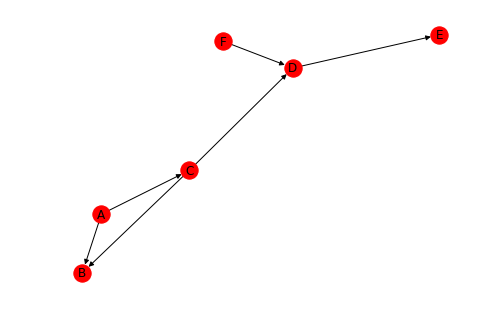

In [149]:
# визуализация, может пригодится)
import networkx as nx                      
import matplotlib.pyplot as plt

g = nx.DiGraph(js).reverse()

#nx.draw(g)
nx.draw_spring(g, with_labels=True)

In [ ]:
# решение Кости Зайцева
import json

data = json.loads(input())
children = dict()

for cls in data:
    for par in cls["parents"]:
        if par not in children:
            children[par] = []
        children[par].append(cls["name"])

def dfs(v, used):
    size = 1
    used.add(v)
    if v not in children:
        return size

    for child in children[v]:
        if child not in used:
            size += dfs(child, used)

    return size

ans = []

for cls in data:
    ans.append((cls["name"], dfs(cls["name"], set())))

for i in sorted(ans):
    print(i[0], ":", i[1])

---

# API
предоставление расширенной функциональности <br>
здесь будет рассмотрен web-api

In [6]:
# https://openweathermap.org/
# раздел api 
# выбрав нужный раздел, нужно обратить внимание на параметры и пример, и далее это можно использовать 
# нам нужен "API call"

import requests 

api_url = 'http://api.openweathermap.org/data/2.5/weather?'
 
params = {                  # словарь с ключами - названиями параметров
    'q': 'Saint Petersburg', # Saint-Petersburg - status_code 404
    'appid': '1fb1b976b99052c8634bfa6827f1ebcb'
}

res = requests.get(api_url, params = params)
print(res.status_code)
print(res.headers['Content-Type']) # здесь видно, что наши данные в формате json
print(res.json()) # res.json = json.loads(res.text) # чтобы вытащить именно градусы, нужно вначале понять
# где они лежат

200
application/json; charset=utf-8
{'coord': {'lon': 30.32, 'lat': 59.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.15, 'pressure': 1016, 'humidity': 87, 'temp_min': 286.15, 'temp_max': 286.15}, 'visibility': 10000, 'wind': {'speed': 1}, 'clouds': {'all': 0}, 'dt': 1535401800, 'sys': {'type': 1, 'id': 7267, 'message': 0.0025, 'country': 'RU', 'sunrise': 1535337814, 'sunset': 1535390092}, 'id': 498817, 'name': 'Saint Petersburg', 'cod': 200}


In [28]:
data= res.json()
data['main']['temp']

286.15

### Сформируем утилиту

In [37]:
city = input('назови город, родной - ')

api_url = 'http://api.openweathermap.org/data/2.5/weather?'
 
params = {                  # словарь с ключами - названиями параметров
    'q': city, # Saint-Petersburg - status_code 404
    'appid': '1fb1b976b99052c8634bfa6827f1ebcb', 
    'units': 'metric'
}

res = requests.get(api_url, params = params)
data = res.json()

print("Щас в городе {} {} градусов".format(city, data['main']['temp']))

res.url

назови город, родной - Maykop
Щас в городе Maykop 19.84 градусов


'http://api.openweathermap.org/data/2.5/weather?q=Maykop&appid=1fb1b976b99052c8634bfa6827f1ebcb&units=metric'

---

В этой задаче вам необходимо воспользоваться API сайта [numbersapi.com](numbersapi.com)

Вам дается набор чисел. Для каждого из чисел необходимо узнать, существует ли интересный математический факт об этом числе.

Для каждого числа выведите Interesting, если для числа существует интересный факт, и Boring иначе. <br>
Выводите информацию об интересности чисел в таком же порядке, в каком следуют числа во входном файле.

Пример запроса к интересному числу: <br>
http://numbersapi.com/31/math?json=true

Пример запроса к скучному числу:<br>
http://numbersapi.com/999/math?json=true

**Пример входного файла:**
```
31
999
1024
502
```
**Пример выходного файла:**
```
Interesting
Boring
Interesting
Boring```

In [98]:
# решение верно
import requests


doc = []
with open('dataset_24476_3.txt') as f: 
    for line in f: 
        line = line.strip()
        doc.append(int(line))
        
        
params = {
    'json':'true'
    
}
for i in doc: 
    res = requests.get('http://numbersapi.com/{}/math'.format(i), params=params)
    js = res.json()
    #print(res.url)
    if js['found']== False: 
        print('Boring')
    else: 
        print('Interesting')

Boring
Interesting
Interesting
Interesting
Interesting
Interesting
Interesting
Interesting
Interesting
Boring
Interesting
Interesting
Interesting
Interesting
Interesting


---

В этой задаче вам необходимо воспользоваться API сайта [artsy.net](https://developers.artsy.net/start)

API проекта Artsy предоставляет информацию о некоторых деятелях искусства, их работах, выставках.

В рамках данной задачи вам понадобятся сведения о деятелях искусства (назовем их, условно, художники).

Вам даны идентификаторы художников в базе Artsy.<br>
Для каждого идентификатора получите информацию о имени художника и годе рождения.<br>
Выведите имена художников в порядке неубывания года рождения. В случае если у художников одинаковый год рождения, выведите их имена в лексикографическом порядке.

**Работа с API Artsy**

Полностью открытое и свободное API предоставляют совсем немногие проекты. В большинстве случаев, для получения доступа к API необходимо зарегистрироваться в проекте, создать свое приложение, и получить уникальный ключ (или токен), и в дальнейшем все запросы к API осуществляются при помощи этого ключа.

Чтобы начать работу с API проекта Artsy, вам необходимо пройти на стартовую страницу документации к API https://developers.artsy.net/start и выполнить необходимые шаги, а именно зарегистрироваться, создать приложение, и получить пару идентификаторов Client Id и Client Secret. Не публикуйте эти идентификаторы.

После этого необходимо получить токен доступа к API. На стартовой странице документации есть примеры того, как можно выполнить запрос и как выглядит ответ сервера. Мы приведем пример запроса на Python.
```python
import requests
import json

client_id = '...'
client_secret = '...'

# инициируем запрос на получение токена
r = requests.post("https://api.artsy.net/api/tokens/xapp_token",
                  data={
                      "client_id": client_id,
                      "client_secret": client_secret
                  })

# разбираем ответ сервера
j = json.loads(r.text)

# достаем токен
token = j["token"]
```
Теперь все готово для получения информации о художниках. На стартовой странице документации есть пример того, как осуществляется запрос и как выглядит ответ сервера. Пример запроса на Python.
```python
# создаем заголовок, содержащий наш токен
headers = {"X-Xapp-Token" : token}


# инициируем запрос с заголовком
r = requests.get("https://api.artsy.net/api/artists/4d8b92b34eb68a1b2c0003f4", headers=headers)

# разбираем ответ сервера
j = json.loads(r.text)

```
**Примечание:**
﻿В качестве имени художника используется параметр sortable_name в кодировке UTF-8.

**Пример входных данных:**
```
4d8b92b34eb68a1b2c0003f4
537def3c139b21353f0006a6
4e2ed576477cc70001006f99
```
**Пример выходных данных:**
```
Abbott Mary
Warhol Andy
Abbas Hamra
```
**Примечание для пользователей Windows**<br>
При открытии файла для записи на Windows по умолчанию используется кодировка CP1251, в то время как для записи имен на сайте используется кодировка UTF-8, что может привести к ошибке при попытке записать в файл имя с необычными символами. Вы можете использовать print, или аргумент encoding функции open.

**Name** --------------```Serge_app``` <br>
**Client Id** ----------```3c4d54210c4df9c961ed``` <br>
**Client Secret** ---```2fdc3185bd03f35c1820f9998e07ab77```

In [ ]:
import requests
import json

client_id = '3c4d54210c4df9c961ed'
client_secret = '2fdc3185bd03f35c1820f9998e07ab77'

# инициируем запрос на получение токена
r = requests.post("https://api.artsy.net/api/tokens/xapp_token",
                  data={
                      "client_id": client_id,
                      "client_secret": client_secret
                  })

# разбираем ответ сервера
j = json.loads(r.text)

# достаем токен
token = j["token"]

In [104]:
exm_lst = ['4d8b92b34eb68a1b2c0003f4',
'537def3c139b21353f0006a',
'4e2ed576477cc70001006f99']

In [108]:
# создаем заголовок, содержащий наш токен
headers = {"X-Xapp-Token" : token}


# инициируем запрос с заголовком
r = requests.get("https://api.artsy.net/api/artists/4d8b92b34eb68a1b2c0003f4", headers=headers)

# разбираем ответ сервера
j = json.loads(r.text)

In [140]:
# работает как надо
import requests
import json

doc = []
with open('dataset_24476_4.txt') as f: 
    for line in f: 
        line = line.strip()
        doc.append(line)
artists = []
for i in doc: 
    res = requests.get("https://api.artsy.net/api/artists/{}".format(i), headers=headers)
    if res.status_code!=404:
        js = json.loads(res.text)
        artists.append((js['birthday'],js['sortable_name']))

artists.sort()
for i in artists:
    print(i[1])    

Abraham Roentgen
Abastenia St. Leger Eberle
Aarnio Eero
Abend Harry
Abate Claudio
Abramović Marina
Ackling Roger
Ableton Miguel
Aaron Joseph
Abts Tomma
Acea Francis
Ackermann Rita
Abidin Adel
Ackerman Fiona
Adam D. Miller


---

# 3.7 XML, библиотека ElementTree, библиотека lxml

![](Selection_002.png)

в териминологии xml присутствует метафора дерева 
![](Selection_003.png)

Кроме того, у каждого элемента могут быть аттрибуты. Это какая-то дополнительная инф. об элементы (id = '1'). Значение аттрибута всегда в кавычках

In [143]:
from xml.etree import ElementTree

tree = ElementTree.parse('example.xml')

In [147]:
root = tree.getroot()

In [151]:
print(root.tag, root.attrib) # пара элемент аттрибут

studentsList {}


In [166]:
for child in root:
    print(child.tag, child.attrib)
# можно также через индексацию обращаться к детям детей

print(root[0][0].text) # пара tag - text представляют собой пару элемент - хранимое значение

# все элементы дерева, имеют класс element

student {'id': '1'}
student {'id': '2'}
Greg


In [204]:
for element in root.iter('scores'): # находит элемент(scores), и возвращает его итератор
    print(element)

<Element 'firstName' at 0x7f2a2016ef48>
<Element 'firstName' at 0x7f2a2016ee58>


In [207]:
for element in root.iter('scores'): 
    score_sum = 0
    for child in element:
        score_sum+=float(child.text)
    print(score_sum)

240.0
240.2


### Запись в файл

In [208]:
tree.write('example_copy.xml')

In [212]:
greg = root[0]
module1 = next(greg.iter('module1')) # оператор next нужен для того, чтобы избавится от итератора, 
# и работать со значением
print(module1, module1.text)
module1.text = str(float(module1.text) + 30) # то есть все изменения происходят прямо в дерево
tree.write('example_copy.xml')

<Element 'module1' at 0x7f2a2016ed18> 100.0


In [217]:
# изменить теперь Грегу сертификат 

tree = ElementTree.parse('example_copy.xml')
root = tree.getroot()

greg = root[0]
#cert = next(greg.iter('certificate'))   # один вариант, он работает 
#cert.text = 'with distinction'
#tree.write('example_copy.xml')

cert = greg[2]
cert.set('type', 'with_distinction') # здесь мы меняем атрибут
tree.write('example_copy.xml')

### Как добавить или создать элемент из другого элемента

In [221]:
description = ElementTree.Element('description')
description.text = "Showed_Exelent_skils_durring_the_course"
greg.append(description)

tree.write('example_copy.xml')

In [226]:
# как убрать

description = greg.find('description') # метод find находит первое вхождение в таким названием
greg.remove(description)
tree.write('example_copy.xml')

### creation
как создать с самого начало

In [231]:
from xml.etree import ElementTree

root = ElementTree.Element("student")

first_name = ElementTree.SubElement(root, "firstName") # 1 arg, чей ребенок, кто 
first_name.text = "Greg"

second_name = ElementTree.SubElement(root, "secondName")
second_name.text = "Dean"

scores = ElementTree.SubElement(root, "scores")

module1 = ElementTree.SubElement(scores, "module1")
module1.text = "100"

module2 = ElementTree.SubElement(scores, "module2")
module2.text = "80"

module3 = ElementTree.SubElement(scores, "module3")
module3.text = "90"

tree = ElementTree.ElementTree(root)
tree.write("student.xml")

### LXML

In [234]:
from lxml import etree
import requests

res = requests.get('https://docs.python.org/3/')
print(res.status_code)
print(res.headers['Content-Type'])

200
text/html


In [237]:
parser = etree.HTMLParser() # 'умная часть пакета', так ка кпозволяет работать с 'плохими' html страницами 
root = etree.fromstring(res.text, parser) # эта функция, превращает грязные данные в чистые

for i in root.iter('div'):
    print(i, i.attrib)

<Element div at 0x7f2a0a4d3ac8> {'class': 'related', 'role': 'navigation', 'aria-label': 'related navigation'}
<Element div at 0x7f2a09a67588> {'class': 'inline-search', 'style': 'display: none', 'role': 'search'}
<Element div at 0x7f2a09a67f88> {'class': 'document'}
<Element div at 0x7f2a0a4d3ac8> {'class': 'documentwrapper'}
<Element div at 0x7f2a09a67588> {'class': 'bodywrapper'}
<Element div at 0x7f2a09a67f88> {'class': 'body', 'role': 'main'}
<Element div at 0x7f2a0a4d3ac8> {'class': 'sphinxsidebar', 'role': 'navigation', 'aria-label': 'main navigation'}
<Element div at 0x7f2a09a67588> {'class': 'sphinxsidebarwrapper'}
<Element div at 0x7f2a09a67f88> {'class': 'clearer'}
<Element div at 0x7f2a0a4d3ac8> {'class': 'related', 'role': 'navigation', 'aria-label': 'related navigation'}
<Element div at 0x7f2a09a67588> {'class': 'inline-search', 'style': 'display: none', 'role': 'search'}
<Element div at 0x7f2a09a67f88> {'class': 'footer'}



---

Вам дано описание пирамиды из кубиков в формате XML. <br>
Кубики могут быть трех цветов: красный (**red**), зеленый (**green**) и синий (**blue**). <br>
Для каждого кубика известны его цвет, и известны кубики, расположенные прямо под ним.

**Пример:**
```xml
<cube color="blue">
  <cube color="red">
    <cube color="green">
    </cube>
  </cube>
  <cube color="red">
  </cube>
</cube>
```
 

Введем понятие ценности для кубиков. Самый верхний кубик, соответствующий корню XML документа имеет ценность **1**. Кубики, расположенные прямо под ним, имеют ценность **2**. Кубики, расположенные прямо под нижележащими кубиками, имеют ценность **3**. И т. д.

Ценность цвета равна сумме ценностей всех кубиков этого цвета.

Выведите через пробел три числа: ценности красного, зеленого и синего цветов.

**Sample Input:**

```html
<cube color="blue"><cube color="red"><cube color="green"></cube></cube><cube color="red"></cube></cube>
```
**Sample Output:**
```
4 3 1
```


In [46]:
# разные способы распарсить

# 1-------------------------------------------------------
from xml.etree import ElementTree

x = input() 
root = ElementTree.fromstring(x)
tree = ElementTree.ElementTree(root)

# 2-------------------------------------------------------
from lxml import etree

x = input()
parser = etree.HTMLParser() 
root = etree.fromstring(x, parser)

# 3-------------------------------------------------------
from xml.etree import ElementTree

x = input() 
parser = ElementTree.XMLParser()
root = ElementTree.fromstring(x, parser)

<cube color="blue"><cube color="red"><cube color="green"></cube></cube><cube color="red"></cube></cube>


In [111]:
# Your code complexity score is 10.2 (best for this step is 6.32)
root = ElementTree.fromstring(input())
dic = {}
def chld(el, lvl = 0): 
    lvl+=1
    if el.attrib['color'] not in dic:
        dic[el.attrib['color']]=lvl
    else:
        dic[el.attrib['color']] += lvl
    ls = el.getchildren()
    #print(el.attrib, lvl)
    for i in ls:
        chld(i, lvl)
chld(root)

print(dic['red'], dic['green'], dic['blue'])

<cube color="blue"><cube color="red"><cube color="green"></cube></cube><cube color="red"></cube></cube>
4 3 1


In [100]:
# хороший способ, без рекурсии, но не работает 
from xml.etree import ElementTree

x = input() 
root = ElementTree.fromstring(x)

it  = root.iter('cube')

lst = []
for i in it: 
    if i.attrib:
        lst.append(i.attrib['color'])

dic = {}
for i, ii in enumerate(lst):
    dic[ii] = i+1

print(dic['red'], dic['green'], dic['blue'])

<cube color="blue"><cube color="red"><cube color="green"></cube></cube><cube color="red"></cube></cube>
4 3 1


In [ ]:
# решение модератора, более чистый код, нежели у меня

from xml.etree import ElementTree

root = ElementTree.fromstring(input())
colors = {"red": 0, "green": 0, "blue": 0}

def getcubes(root, value):
    colors[root.attrib['color']] += value
    for child in root:
        getcubes(child, value+1)

getcubes(root,1)
print(colors["red"], colors["green"], colors["blue"])